I decided to treat this as a classification problem by creating a new binary variable affair(did the woman have at 
least one affair?) and trying to predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels.
It was derived from a survey of women in 1974 by Redbook magazine,in which married women were asked about their participation 
in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.
Description of Variables 
The dataset contains 6366 observations of 9 variables:
    rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
    age: woman's age
    yrs_married: number of years married
    children: number of children
    religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
    educ:level of education (9=gradeschool,12=highschool,14=somecollege,16=college graduate, 
                             17 = some graduate school, 20 = advanced degree)
    occupation:woman's occupation(1=student,2=farming/semi-skilled/unskilled, 3="whitecollar", 4=teacher / nurse / writer /                             technician /skilled, 5=managerial/business, 6=professional with advanced degree) 
    occupation_husb: husband's occupation (same coding as above)
    affairs: time spent in extra-marital affairs
    

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [4]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [5]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [6]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


rate_marriage  1.0  2.0  3.0   4.0   5.0
affair                                  
0               25  127  446  1518  2197
1               74  221  547   724   487


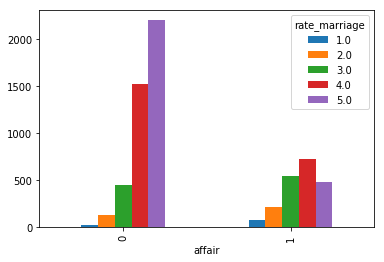

In [7]:
print(pd.crosstab(dta['affair'],dta['rate_marriage'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['rate_marriage'],rownames=['affair']).plot(kind='bar')

age     17.5  22.0  27.0  32.0  37.0  42.0
affair                                    
0        126  1394  1298   644   364   487
1         13   406   633   425   270   306


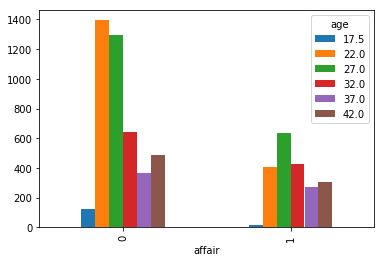

In [8]:
print(pd.crosstab(dta['affair'],dta['age'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['age'],rownames=['affair']).plot(kind='bar')

yrs_married  0.5   2.5   6.0   9.0   13.0  16.5  23.0
affair                                               
0             354  1595   754   348   347   449   466
1              16   439   387   254   243   369   345


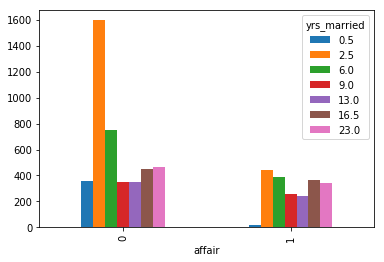

In [9]:
print(pd.crosstab(dta['affair'],dta['yrs_married'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['yrs_married'],rownames=['affair']).plot(kind='bar')

children   0.0  1.0  2.0  3.0  4.0  5.5
affair                                 
0         1912  747  873  460  197  124
1          502  412  608  321  131   79


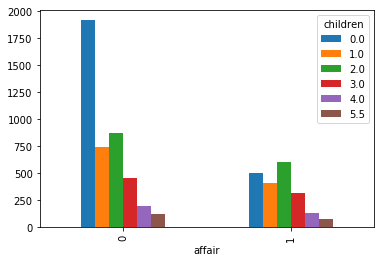

In [10]:
print(pd.crosstab(dta['affair'],dta['children'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['children'],rownames=['affair']).plot(kind='bar')

religious  1.0   2.0   3.0  4.0
affair                         
0          613  1448  1715  537
1          408   819   707  119


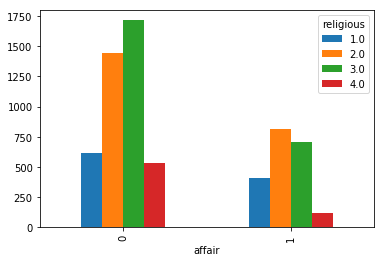

In [11]:
print(pd.crosstab(dta['affair'],dta['religious'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['religious'],rownames=['affair']).plot(kind='bar')

educ    9.0   12.0  14.0  16.0  17.0  20.0
affair                                    
0         27  1361  1469   844   370   242
1         21   723   808   273   140    88


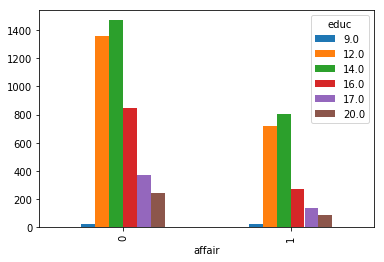

In [12]:
print(pd.crosstab(dta['affair'],dta['educ'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['educ'],rownames=['affair']).plot(kind='bar')

occupation  1.0  2.0   3.0   4.0  5.0  6.0
affair                                    
0            34  607  1818  1354  431   69
1             7  252   965   480  309   40


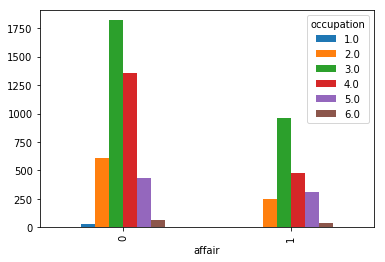

In [13]:
print(pd.crosstab(dta['affair'],dta['occupation'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['occupation'],rownames=['affair']).plot(kind='bar')

occupation_husb  1.0  2.0  3.0   4.0   5.0  6.0
affair                                         
0                181  882  317  1391  1177  365
1                 48  426  173   639   602  165


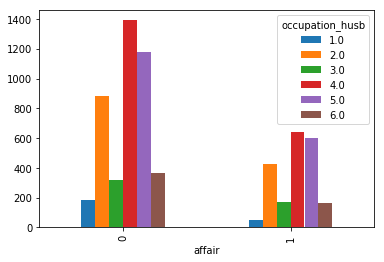

In [14]:
print(pd.crosstab(dta['affair'],dta['occupation_husb'],rownames=['affair']))
pd.crosstab(dta['affair'],dta['occupation_husb'],rownames=['affair']).plot(kind='bar')

In [15]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [16]:
y.columns

Index(['affair'], dtype='object')

In [17]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [18]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',                        
                        'C(occupation)[T.3.0]':'occ_3',                        
                        'C(occupation)[T.4.0]':'occ_4',                        
                        'C(occupation)[T.5.0]':'occ_5',                        
                        'C(occupation)[T.6.0]':'occ_6',                        
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',                        
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',                        
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',                        
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',                        
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [19]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [20]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [21]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

#### Now the logistics regression can be applied two ways

##### 1. Using statsmodel
##### 2. Using sklearn

## Using statsmodel

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
type(y)

numpy.ndarray

In [24]:
# fit the model
logit = sm.Logit(y, X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [25]:
# model summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.137      
Dependent Variable: y                AIC:              6946.3465  
Date:               2019-04-22 09:53 BIC:              7061.2449  
No. Observations:   6366             Log-Likelihood:   -3456.2    
Df Model:           16               LL-Null:          -4002.5    
Df Residuals:       6349             LLR p-value:      1.5339e-222
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
occ_2              0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
occ_3              0.7027   0.4415   1.5917 0.1114 -0.1626  1.5679
occ_4              0.4714   0.4425   1.0652 0.2868 -0.3959  1.3387
occ_5              1.0542   0.4466   2.3603 0.0183  0.1788  1.9296
occ_6              1.1080   0.4942   2.2420 0.0250  0.1394  2.0767
occ_husb_2         0.1704   0.1861   0.9160 0.3597 -0.1943  0.5352
occ_husb_3         0.2842   0.2022   1.4057 0.1598 -0.1121  0.6804
occ_husb_4         0.1428   0.1810   0.7892 0.4300 -0.2119  0.4976
occ_husb_5         0.1723   0.1826   0.9436 0.3454 -0.1856  0.5303
occ_husb_6         0.1828   0.2037   0.8974 0.3695 -0.2164  0.5819
rate_marriage     -0.7102   0.0315 -22.5600 0.0000 -0.7719 -0.6485
age               -0.0613   0.0103  -5.9361 0.0000 -0.0815 -0.0410
yrs_married        0.1080   0.0110   9.8364 0.0000  0.0865  0.1295
children           0.0156   0.0321   0.4881 0.6255 -0.0472  0.0785
religious         -0.3754   0.0349 -10.7657 0.0000 -0.4437 -0.3070
educ              -0.0017   0.0174  -0.0992 0.9210 -0.0358  0.0324
==================================================================

"""

## Using sklearn

In [26]:
# fit the model
model = LogisticRegression()
model = model.fit(X, y)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
# accuracy of the model
model.score(X, y)

0.7258875274897895

In [28]:
y.mean()

0.3224945020420987

In [29]:
# examine the coefficients
for coef in zip(X.columns, np.transpose(model.coef_).tolist()):
    print(coef)

('Intercept', [1.4898360570592706])
('occ_2', [0.1880663965967619])
('occ_3', [0.4989481225612341])
('occ_4', [0.2506681436923961])
('occ_5', [0.8390080011190776])
('occ_6', [0.8339082482822548])
('occ_husb_2', [0.19063622424850235])
('occ_husb_3', [0.29783290491447884])
('occ_husb_4', [0.16140913839761342])
('occ_husb_5', [0.18777109156281066])
('occ_husb_6', [0.1940164734021257])
('rate_marriage', [-0.7031197303674775])
('age', [-0.058418128652529135])
('yrs_married', [0.10567669374160807])
('children', [0.016919829103316658])
('religious', [-0.37113511601893623])
('educ', [0.004015837061451848])


## Model Evaluation

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4456, 17), (1910, 17), (4456,), (1910,))

In [32]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [34]:
#class probabilities
prob = model2.predict_proba(X_test)
prob

array([[0.35142488, 0.64857512],
       [0.90952576, 0.09047424],
       [0.72576603, 0.27423397],
       ...,
       [0.55736751, 0.44263249],
       [0.81213933, 0.18786067],
       [0.74729595, 0.25270405]])

In [35]:
# evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, prob[:, 1]))

0.7298429319371728
0.7459619860896347


######The accuracy is around 73%, which is the same as that of training and predicted on the same data.

In [36]:
#confusion matrix and classification report
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [37]:
# evaluate the model using cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

#### It's still performing at 73% accuracy which is good.